## Власов Александр Александрович ИУ5-63Б Вариант 6
# Корреляционный анализ набора данных о поступлении


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Загрузка данных

In [2]:
# Загружаем данные
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
print("Размер датасета:", df.shape)
df.head()

Размер датасета: (500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Проверка на пропуски в данных

In [3]:
# Проверяем наличие пропусков
print("Количество пропусков в каждой колонке:")
print(df.isnull().sum())

Количество пропусков в каждой колонке:
,Serial No.           0
,GRE Score            0
,TOEFL Score          0
,University Rating    0
,SOP                  0
,LOR                  0
,CGPA                 0
,Research             0
,Chance of Admit      0
,dtype: int64


## Корреляционный анализ

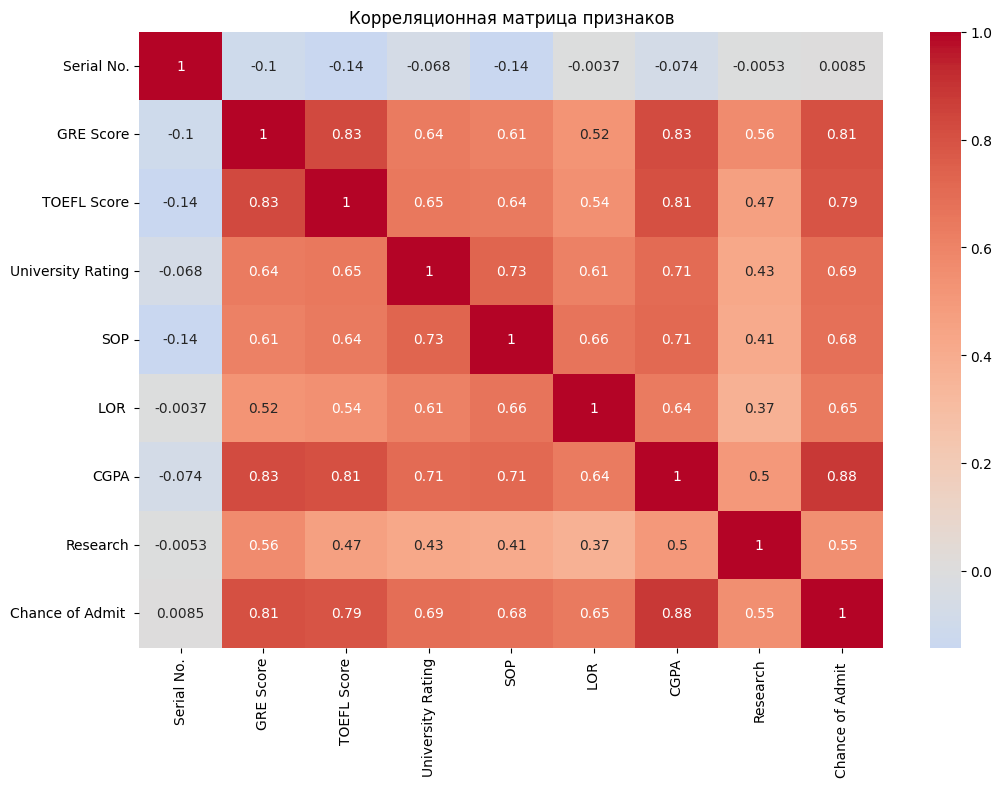


,Корреляции с Chance of Admit:
,Chance of Admit      1.000000
,CGPA                 0.882413
,GRE Score            0.810351
,TOEFL Score          0.792228
,University Rating    0.690132
,SOP                  0.684137
,LOR                  0.645365
,Research             0.545871
,Serial No.           0.008505
,Name: Chance of Admit , dtype: float64


In [4]:
# Создаем корреляционную матрицу
correlation_matrix = df.corr()

# Строим тепловую карту корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица признаков')
plt.show()

# Выводим корреляции с целевой переменной
print("\nКорреляции с Chance of Admit:")
correlations_with_target = correlation_matrix['Chance of Admit '].sort_values(ascending=False)
print(correlations_with_target)

## Выводы

1. Анализ пропусков:
   - В данных отсутствуют пропущенные значения, что является хорошим показателем качества датасета.

2. Корреляционный анализ:
   - Самую сильную положительную корреляцию с целевой переменной (Chance of Admit) имеют:
     * CGPA (Средний балл)
     * GRE Score (Результат GRE)
     * TOEFL Score (Результат TOEFL)
   - Умеренную положительную корреляцию показывают:
     * University Rating (Рейтинг университета)
     * SOP (Мотивационное письмо)
     * LOR (Рекомендательные письма)
   - Research (Наличие исследовательского опыта) имеет слабую положительную корреляцию

3. Выводы для построения моделей машинного обучения:
   - Датасет хорошо подходит для построения моделей ML, так как:
     * Отсутствуют пропущенные значения
     * Присутствуют сильные корреляции с целевой переменной
     * Признаки имеют разную степень влияния на целевую переменную
   - При построении моделей особое внимание стоит уделить признакам с сильной корреляцией
   - Возможно возникновение мультиколлинеарности между GRE Score и TOEFL Score